## <Center> Text Analytics

### Description
    A dataset of Shark Tank episodes is made available. It contains 495 entrepreneurs making their pitch to the VC sharks. 
    Use “Description” column as an independent variable to identify whether the ‘deal’ happened or not.
      

**-->Importing the required libraries & loading the dataset**

In [136]:
"""Importing all the required libraries"""
##Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

data = pd.read_csv('Shark_Tank_Companies.csv')

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deal         495 non-null    bool   
 1   description  495 non-null    object 
 2   Unnamed: 2   0 non-null      float64
 3   Unnamed: 3   0 non-null      float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
dtypes: bool(1), float64(16), object(1)
memory usage: 6

**-->Exploratory data analysis**

In [138]:
#- Null value removal
data.isnull().sum()

deal             0
description      0
Unnamed: 2     495
Unnamed: 3     495
Unnamed: 4     495
Unnamed: 5     495
Unnamed: 6     495
Unnamed: 7     495
Unnamed: 8     495
Unnamed: 9     495
Unnamed: 10    495
Unnamed: 11    495
Unnamed: 12    495
Unnamed: 13    495
Unnamed: 14    495
Unnamed: 15    495
Unnamed: 16    495
Unnamed: 17    495
dtype: int64

In [139]:
data = data.dropna(axis=1)
data.head()

,deal,description
0,False,Bluetooth device implant for your ear.
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...


In [140]:
#- Number of words
data['word_count'] = data['description'].apply(lambda x: len(str(x).split(" ")))
data[['description','word_count']].head()

,description,word_count
0,Bluetooth device implant for your ear.,6
1,Retail and wholesale pie factory with two reta...,12
2,Ava the Elephant is a godsend for frazzled par...,37
3,"Organizing, packing, and moving services deliv...",9
4,Interactive media centers for healthcare waiti...,14


In [141]:
# - Number of characters
data['char_count'] = data['description'].str.len() ## this also includes spaces
data[['description','char_count']].head()

,description,char_count
0,Bluetooth device implant for your ear.,38
1,Retail and wholesale pie factory with two reta...,73
2,Ava the Elephant is a godsend for frazzled par...,244
3,"Organizing, packing, and moving services deliv...",68
4,Interactive media centers for healthcare waiti...,112


In [142]:
# - Average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['description'].apply(lambda x: avg_word(x))
data[['description','avg_word']].head()

,description,avg_word
0,Bluetooth device implant for your ear.,5.500000
1,Retail and wholesale pie factory with two reta...,5.166667
2,Ava the Elephant is a godsend for frazzled par...,5.621622
3,"Organizing, packing, and moving services deliv...",6.666667
4,Interactive media centers for healthcare waiti...,7.071429


In [143]:
#Number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords'] = data['description'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['description','stopwords']].head()

,description,stopwords
0,Bluetooth device implant for your ear.,2
1,Retail and wholesale pie factory with two reta...,3
2,Ava the Elephant is a godsend for frazzled par...,13
3,"Organizing, packing, and moving services deliv...",2
4,Interactive media centers for healthcare waiti...,2


In [144]:
#Number of special characters
data['hastags'] = data['description'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data['atsign'] = data['description'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['description','hastags','atsign']]

,description,hastags,atsign
0,Bluetooth device implant for your ear.,0,0
1,Retail and wholesale pie factory with two reta...,0,0
2,Ava the Elephant is a godsend for frazzled par...,0,0
3,"Organizing, packing, and moving services deliv...",0,0
4,Interactive media centers for healthcare waiti...,0,0
...,...,...,...
490,Zoom Interiors is a virtual service for interi...,0,0
491,Spikeball started out as a casual outdoors gam...,0,0
492,Shark Wheel is out to literally reinvent the w...,0,0
493,Adriana Montano wants to open the first Cat Ca...,0,0


In [145]:
#Number of numerics
data['numerics'] = data['description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['description','numerics']]

,description,numerics
0,Bluetooth device implant for your ear.,0
1,Retail and wholesale pie factory with two reta...,0
2,Ava the Elephant is a godsend for frazzled par...,0
3,"Organizing, packing, and moving services deliv...",0
4,Interactive media centers for healthcare waiti...,0
...,...,...
490,Zoom Interiors is a virtual service for interi...,0
491,Spikeball started out as a casual outdoors gam...,2
492,Shark Wheel is out to literally reinvent the w...,0
493,Adriana Montano wants to open the first Cat Ca...,0


In [146]:
# Number of uppercase words
data['upper'] = data['description'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['description','upper']]

,description,upper
0,Bluetooth device implant for your ear.,0
1,Retail and wholesale pie factory with two reta...,0
2,Ava the Elephant is a godsend for frazzled par...,0
3,"Organizing, packing, and moving services deliv...",0
4,Interactive media centers for healthcare waiti...,0
...,...,...
490,Zoom Interiors is a virtual service for interi...,0
491,Spikeball started out as a casual outdoors gam...,0
492,Shark Wheel is out to literally reinvent the w...,0
493,Adriana Montano wants to open the first Cat Ca...,0


**--> Performing Advanced Text Pre-processing of text data**

In [147]:
#- Lower casing
data['description'] = data['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['description'].head()

0               bluetooth device implant for your ear.
1    retail and wholesale pie factory with two reta...
2    ava the elephant is a godsend for frazzled par...
3    organizing, packing, and moving services deliv...
4    interactive media centers for healthcare waiti...
Name: description, dtype: object

In [148]:
#- Punctuation removal
data['description'] = data['description'].str.replace('[^\w\s]','')
data['description'].head()

0                bluetooth device implant for your ear
1    retail and wholesale pie factory with two reta...
2    ava the elephant is a godsend for frazzled par...
3    organizing packing and moving services deliver...
4    interactive media centers for healthcare waiti...
Name: description, dtype: object

In [149]:
# -Stopwords removal
stop = stopwords.words('english')
data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['description'].head()

0                         bluetooth device implant ear
1    retail wholesale pie factory two retail locati...
2    ava elephant godsend frazzled parents young ch...
3    organizing packing moving services delivered c...
4    interactive media centers healthcare waiting r...
Name: description, dtype: object

In [151]:
#- Frequent words removal (if require)
freq = pd.Series(' '.join(data['description']).split()).value_counts()[:1]
freq
#this is the most occured word in the dataset

made    73
dtype: int64

In [152]:
## removing the most occured words from text
freq = list(freq.index)
data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['description'].head()

0                         bluetooth device implant ear
1    retail wholesale pie factory two retail locati...
2    ava elephant godsend frazzled parents young ch...
3    organizing packing moving services delivered c...
4    interactive media centers healthcare waiting r...
Name: description, dtype: object

In [153]:
#- Rare words removal (if require)
freq = pd.Series(' '.join(data['description']).split()).value_counts()[-5:]
freq
#These are the 5 rarest occuring words in the dataset

inflating    1
stopper      1
becomes      1
kennel       1
cookware     1
dtype: int64

In [154]:
freq = list(freq.index)
data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['description'].head()

0                         bluetooth device implant ear
1    retail wholesale pie factory two retail locati...
2    ava elephant godsend frazzled parents young ch...
3    organizing packing moving services delivered c...
4    interactive media centers healthcare waiting r...
Name: description, dtype: object

In [91]:
#!pip install textblob      #for installation
!pip3 install -U textblob
# import textblob            #to import
# from textblob import TextBlob

Requirement already up-to-date: textblob in c:\users\oth.nousatraining\anaconda3\lib\site-packages (0.15.3)


In [155]:
#- Spelling correction (if require)
from textblob import TextBlob
data['description'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                           bluetooth device plant ear
1    retail wholesale pie factory two retail locati...
2    va elephant godson grizzled parents young chil...
3    organizing packing moving services delivered c...
4    interactive media centers healthcare waiting r...
Name: description, dtype: object

In [160]:
#- Tokenization
#dividing the text into a sequence of words or sentences
TextBlob(data['description'][0]).words

WordList(['bluetooth', 'device', 'implant', 'ear'])

In [161]:
#- Stemming (if require)
# {removal of suffices, like “ing”, “ly”, “s”, etc.}
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['description'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                            bluetooth devic implant ear
1      retail wholesal pie factori two retail locat n...
2      ava eleph godsend frazzl parent young children...
3              organ pack move servic deliv colleg women
4      interact media center healthcar wait room offe...
                             ...                        
490    zoom interior virtual servic interior design d...
491    spikebal start casual outdoor game grown becom...
492    shark wheel liter reinvent wheel innov wheel d...
493    adriana montano want open first cat cafe flori...
494    sway motorsport make threewheel allelectr stre...
Name: description, Length: 495, dtype: object

In [162]:
#- Lemmatization (if require)
#converts the word into its root word
from textblob import Word
data['description'] = data['description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['description'].head()

0                         bluetooth device implant ear
1    retail wholesale pie factory two retail locati...
2    ava elephant godsend frazzled parent young chi...
3    organizing packing moving service delivered co...
4    interactive medium center healthcare waiting r...
Name: description, dtype: object

**--> Performing Feature engineering**

In [164]:
"""Convert text into features"""
### BEGIN SOLUTION
# N-grams {combination of multiple words used together}
TextBlob(data['description'][0]).ngrams(3)
### END SOLUTION

[WordList(['bluetooth', 'device', 'implant']),
 WordList(['device', 'implant', 'ear'])]

In [165]:
# Term frequency(ratio of the count of a word present in a sentence, to the length of the sentence)
    #TF = (Number of times term T appears in the particular row) / (number of terms in that row)
    
tf1 = (data['description'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,retail,2
1,factory,1
2,pie,1
3,new,1
4,location,1
5,two,1
6,jersey,1
7,wholesale,1


In [166]:
# Inverse Document Frequency
    #IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['description'].str.contains(word)])))

tf1

,words,tf,idf
0,retail,2,3.496508
1,factory,1,5.511411
2,pie,1,3.901973
3,new,1,3.026504
4,location,1,5.105945
5,two,1,3.208825
6,jersey,1,6.204558
7,wholesale,1,6.204558


In [167]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,retail,2,3.496508,6.993015
1,factory,1,5.511411,5.511411
2,pie,1,3.901973,3.901973
3,new,1,3.026504,3.026504
4,location,1,5.105945,5.105945
5,two,1,3.208825,3.208825
6,jersey,1,6.204558,6.204558
7,wholesale,1,6.204558,6.204558


In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(data['description'])
train_vect

<495x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 5211 stored elements in Compressed Sparse Row format>

**-->Creating a word cloud with bi-grams**

In [169]:
!pip install wordcloud 

In [170]:

### BEGIN SOLUTION
## Generating wordcloud from text
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=20, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
### END SOLUTION

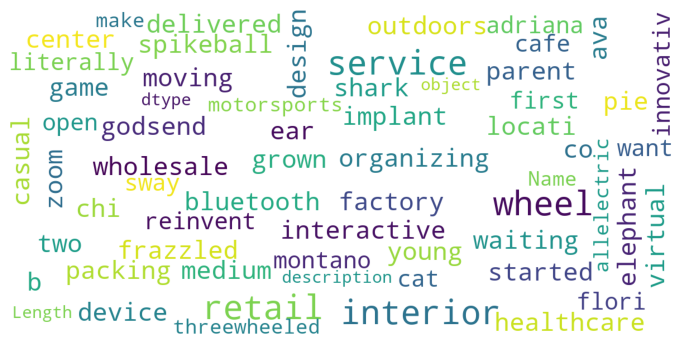

In [171]:
show_wordcloud(data['description'])

**--> Applying ML Algorithm**

In [172]:
"""Performing data modeling on train data and check the model performance"""

data['Tokens']=data['description'].apply(lambda x:TextBlob(x).words)
data.head()

,deal,description,word_count,char_count,avg_word,stopwords,hastags,atsign,numerics,upper,Tokens
0,False,bluetooth device implant ear,6,38,5.500000,2,0,0,0,0,"[bluetooth, device, implant, ear]"
1,True,retail wholesale pie factory two retail locati...,12,73,5.166667,3,0,0,0,0,"[retail, wholesale, pie, factory, two, retail,..."
2,True,ava elephant godsend frazzled parent young chi...,37,244,5.621622,13,0,0,0,0,"[ava, elephant, godsend, frazzled, parent, you..."
3,False,organizing packing moving service delivered co...,9,68,6.666667,2,0,0,0,0,"[organizing, packing, moving, service, deliver..."
4,False,interactive medium center healthcare waiting r...,14,112,7.071429,2,0,0,0,0,"[interactive, medium, center, healthcare, wait..."


In [173]:
# creating tf-idf matrix using sklearn

vectorizer = TfidfVectorizer()
vectorizer_ = vectorizer.fit(data['description'])

In [174]:
#use 80% portion of data for model training and 20% for model testing"""
X = data['description']
Y = data['deal']
from sklearn.model_selection import train_test_split
# Split the data in test & train for modelling
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=27)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(396,) (99,) (396,) (99,)


In [175]:
# Transform the text using TF-IDF Vectorizer
X_train_ = vectorizer_.transform(X_train)
X_test_ = vectorizer_.transform(X_test)
X_train_.shape

(396, 4163)

Check whether the target variable is balanced or not
True     200
False    196
Name: deal, dtype: int64


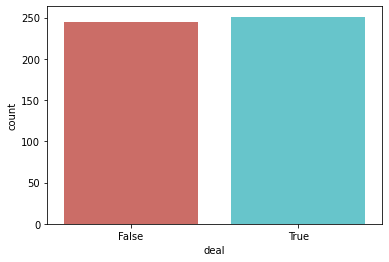

<Figure size 432x288 with 0 Axes>

In [176]:
#Checking the target 
print("Check whether the target variable is balanced or not")
print(y_train.value_counts())

sns.countplot(x='deal', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')
print()

count_no_sub = len(data[data['deal']==0])
count_sub = len(data[data['deal']==1])
print()

### Model 1 : Logistic Regression

In [177]:
#Build logistic regression classifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train_, y_train)
y_pred = classifier.predict(X_test_)

In [239]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("Confusion Matrix below:")
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print()
accuracy_logistic = accuracy_score(y_test, y_pred)* 100.0
print("Accuracy: %.2f%%" % (accuracy_logistic))
print()
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Confusion Matrix below:
[[22 26]
 [17 34]]

Accuracy: 56.57%

              precision    recall  f1-score   support

       False       0.56      0.46      0.51        48
        True       0.57      0.67      0.61        51

    accuracy                           0.57        99
   macro avg       0.57      0.56      0.56        99
weighted avg       0.57      0.57      0.56        99



### Model 2 : SVM

In [179]:
## Check accuracy with SVM
from sklearn.svm import SVC
modelsvc = SVC(kernel='linear').fit(X_train_, y_train)
print(modelsvc)
predict_svc=modelsvc.predict(X_test_)

SVC(kernel='linear')
Training Rsquare:  0.9949494949494949


In [238]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("Confusion Matrix below:")
confusion_matrix_svc = confusion_matrix(y_test, predict_svc)
print(confusion_matrix_svc)
print()
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test, predict_svc) * 100.0
print("Accuracy: %.2f%%" % (accuracy_svm ))
print()
print(classification_report(y_test, predict_svc))

Confusion Matrix below:
[[22 26]
 [19 32]]

Accuracy: 54.55%

              precision    recall  f1-score   support

       False       0.54      0.46      0.49        48
        True       0.55      0.63      0.59        51

    accuracy                           0.55        99
   macro avg       0.54      0.54      0.54        99
weighted avg       0.54      0.55      0.54        99



### Model 3 : XBG

In [181]:
## Check accuracy with XGB
#!pip install xgboost
import xgboost
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train_, y_train)
print(model_xgb)
# make predictions for test data
y_pred_xgb = model_xgb.predict(X_test_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [236]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)* 100.0
print("Accuracy: %.2f%%" % (accuracy_xgb ))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_xgb)

Accuracy: 55.56%


array([[27, 21],
       [23, 28]], dtype=int64)

***As the data is small with less data for the model to train on, the accuracy can be noted to be almost same on all the classification models used to predict the target vaiable. However, the logistic regression model gives the highest accuracy amongst the other classification models with 56.57%, while SVM has a 55.55% accuracy and XGB classifier has 55.56% accuracy.***

In [241]:
#Comparing all three accuracies
comparision_table = pd.DataFrame({'Accuracy': [accuracy_logistic,accuracy_svm,accuracy_xgb]},index=['Logistic Regression','SVM','XGB'])
comparision_table

,Accuracy
Logistic Regression,56.565657
SVM,54.545455
XGB,55.555556
